In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import io

In [ ]:
url_filtered_songs = 'https://drive.google.com/file/d/1zhzXgNwpfD-lPzZ4p8gJjyQCN4CGT6Na/view?usp=sharing'
path_filtered_songs_id = url_filtered_songs.split('/')[-2]
path_filtered_songs = f"https://drive.google.com/uc?id={path_filtered_songs_id}"
gdown.download(path_filtered_songs, 'songs_with_clustered_events_df.csv', quiet=False)

songs_filtered_df = pd.read_csv('songs_with_clustered_events_df.csv')

Downloading...
From: https://drive.google.com/uc?id=1zhzXgNwpfD-lPzZ4p8gJjyQCN4CGT6Na
To: /content/songs_with_clustered_events_df.csv
100%|██████████| 621k/621k [00:00<00:00, 42.8MB/s]


In [ ]:
url_hits = 'https://drive.google.com/file/d/1IKGo0zcm5iNevBRylDl216AtlLYq80xf/view?usp=sharing'
path_hits_id = url_hits.split('/')[-2]
path_hits = f"https://drive.google.com/uc?id={path_hits_id}"
gdown.download(path_hits, 'hits_df_song_id.csv', quiet=False)

hits_df = pd.read_csv('hits_df_song_id.csv')

Downloading...
From: https://drive.google.com/uc?id=1IKGo0zcm5iNevBRylDl216AtlLYq80xf
To: /content/hits_df_song_id.csv
100%|██████████| 2.56M/2.56M [00:00<00:00, 22.3MB/s]


In [ ]:
songs_filtered_df

,song_id,14,16,17,19,20
0,10,1,0,0,0,1
1,18,1,0,0,0,1
2,21,0,0,0,0,1
3,26,0,0,0,1,0
4,111,1,0,0,0,0
...,...,...,...,...,...,...
37081,450038,0,0,0,1,0
37082,450044,1,0,0,0,0
37083,450060,0,0,0,0,1
37084,450082,0,0,0,1,0


In [ ]:
hits_df

,Year,Week,Position,song_id,month,weight
0,1990,1,8,327348,1,0.125
1,1990,1,8,327348,1,0.125
2,1990,2,8,327348,1,0.125
3,1990,2,8,327348,1,0.125
4,1990,3,10,38732,1,0.100
...,...,...,...,...,...,...
102236,2024,52,13,187659,12,0.077
102237,2024,52,15,270800,12,0.067
102238,2024,52,22,446140,12,0.045
102239,2024,52,38,258102,12,0.026


In [ ]:
sucess_events_df = pd.merge(songs_filtered_df, hits_df, on='song_id', how='inner')
sucess_events_df

,song_id,14,16,17,19,20,Year,Week,Position,month,weight
0,13566,1,0,1,1,0,2009,39,22,9,0.045
1,13566,1,0,1,1,0,2009,40,23,10,0.043
2,13566,1,0,1,1,0,2009,41,22,10,0.045
3,13566,1,0,1,1,0,2009,42,24,10,0.042
4,13566,1,0,1,1,0,2009,43,27,10,0.037
...,...,...,...,...,...,...,...,...,...,...,...
3260,445896,0,0,0,1,0,2009,31,27,8,0.037
3261,445896,0,0,0,1,0,2009,32,33,8,0.030
3262,447696,0,0,0,1,0,2001,25,30,6,0.033
3263,447696,0,0,0,1,0,2001,26,34,6,0.029


In [ ]:
number_songs_event = sucess_events_df.shape[0]
number_hits = hits_df.shape[0]
print(f'Songs that are of our interest: {number_songs_event}.\nNumber of songs in the charts: {number_hits}')

Songs that are of our interest: 3265.
Number of songs in the charts: 102241


In [ ]:
100*number_songs_event/number_hits

3.193435118983578

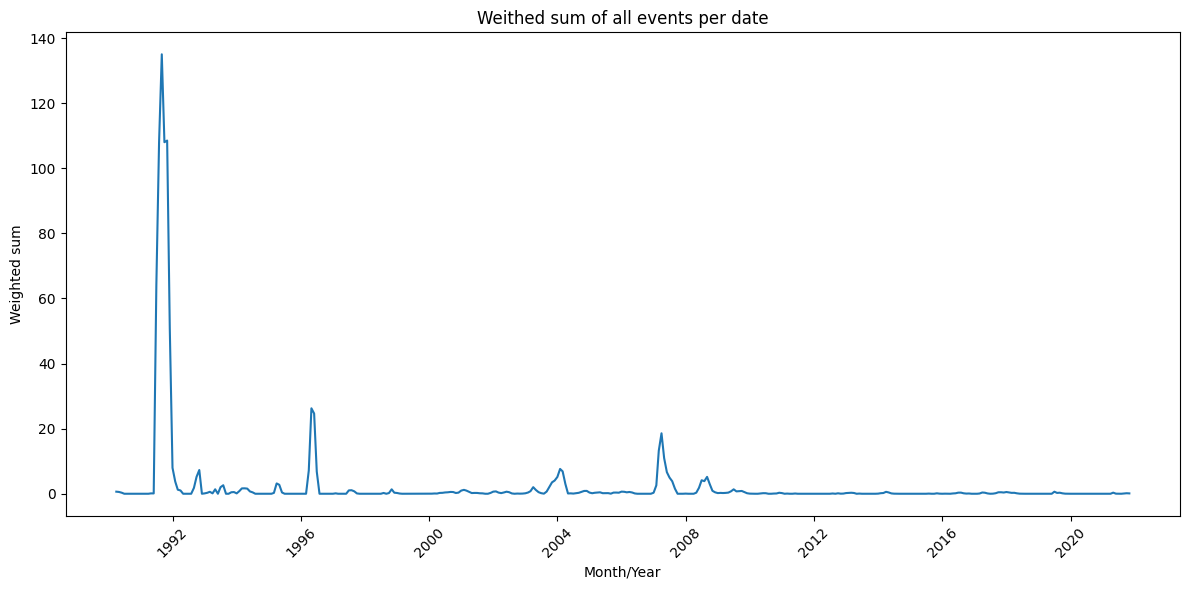

In [ ]:
# 1. Create a datetime column set to the first day of each month
sucess_events_df['date'] = pd.to_datetime(sucess_events_df['Year'].astype(str) + '-' + sucess_events_df['month'].astype(str) + '-01')

# 2. Group by date and sum weight
df_grouped = sucess_events_df.groupby('date')['weight'].sum().reset_index()

# 3. Create a complete range of months/years
fecha_min = df_grouped['date'].min()
fecha_max = df_grouped['date'].max()
rango_fechas = pd.date_range(fecha_min, fecha_max, freq='MS')  # 'MS' stands for month start

# 4. Reindex to include missing months and fill with 0
df_grouped = df_grouped.set_index('date').reindex(rango_fechas, fill_value=0).rename_axis('date').reset_index()

# 5. Plot
plt.figure(figsize=(12,6))
plt.plot(df_grouped['date'], df_grouped['weight'])#, marker='o')
plt.xlabel('Month/Year')
plt.ylabel('Weighted sum')
plt.title('Weithed sum of all events per date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

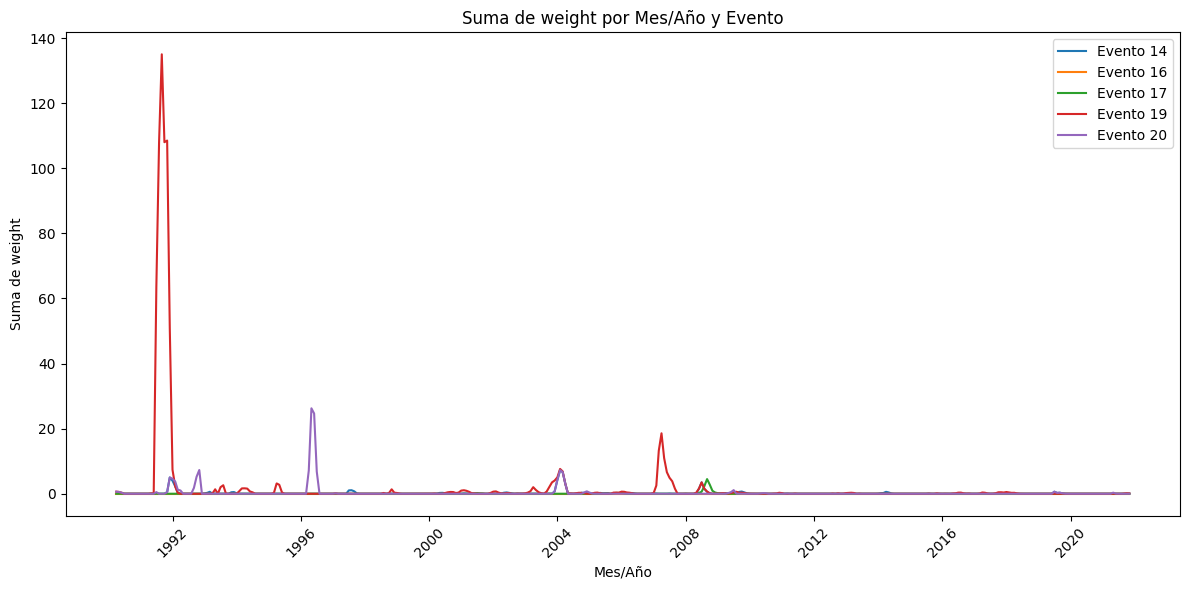

In [ ]:
# 1. Create a datetime column set to the first day of each month
sucess_events_df['fecha'] = pd.to_datetime(sucess_events_df['Year'].astype(str) + '-' + sucess_events_df['month'].astype(str) + '-01')

# 2. Group by date and sum weight
events = [14, 16, 17, 19, 20]

# 3. Create a complete range of months/years
results = []
for event in events:
    temp = sucess_events_df[sucess_events_df[str(event)] == 1]
    temp_grouped = temp.groupby('fecha')['weight'].sum().rename(str(event))
    results.append(temp_grouped)

# 4. Combine all results into a single DataFrame
df_events = pd.concat(results, axis=1).fillna(0)

# 5. Create a complete date range
date_min = sucess_events_df['date'].min()
date_max = sucess_events_df['date'].max()
range_dates = pd.date_range(date_min, date_max, freq='MS')
df_events = df_events.reindex(range_dates, fill_value=0)

# 6. Plot
plt.figure(figsize=(12,6))
for event in events:
    plt.plot(df_events.index, df_events[str(event)], label=f'Event {event}')
plt.xlabel('Month/Year')
plt.ylabel('Weight sum')
plt.title('Weight sum per Month/Year and Event')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

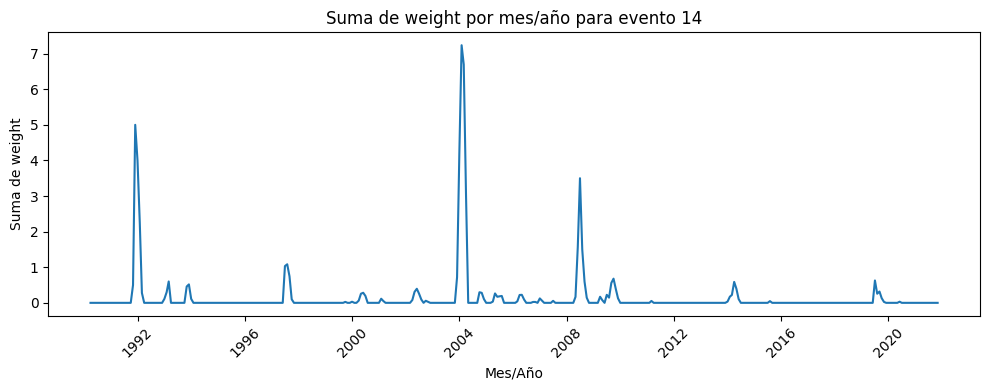

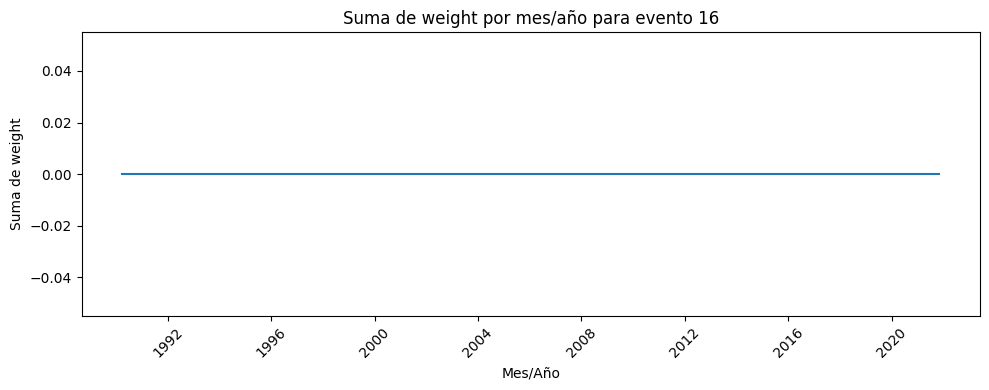

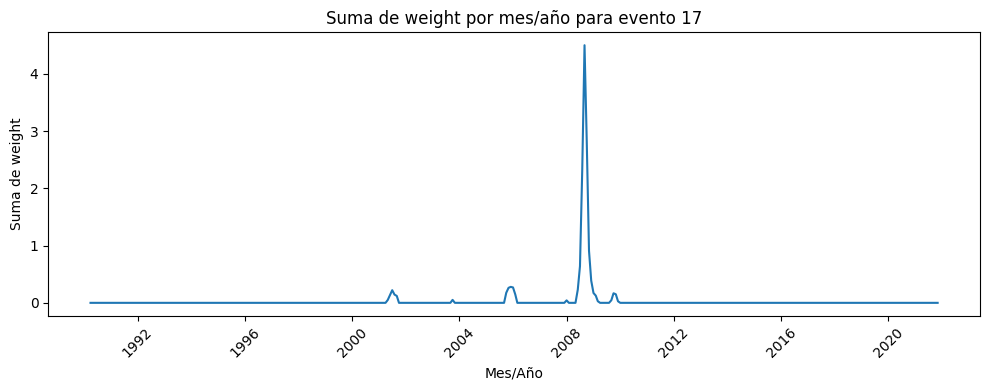

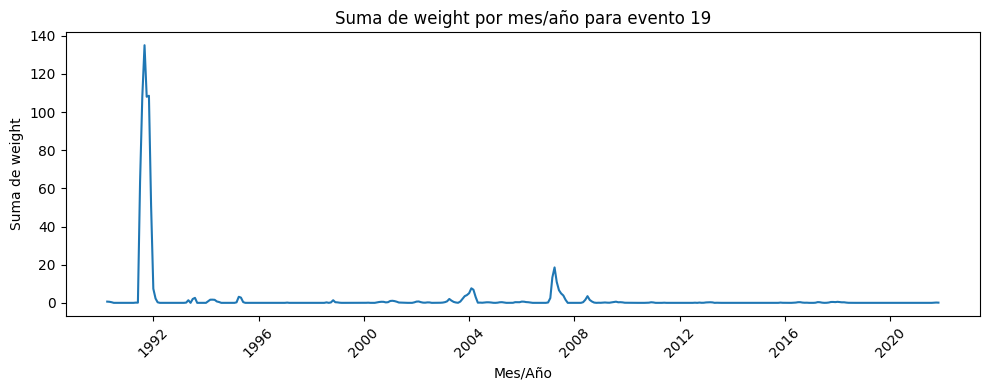

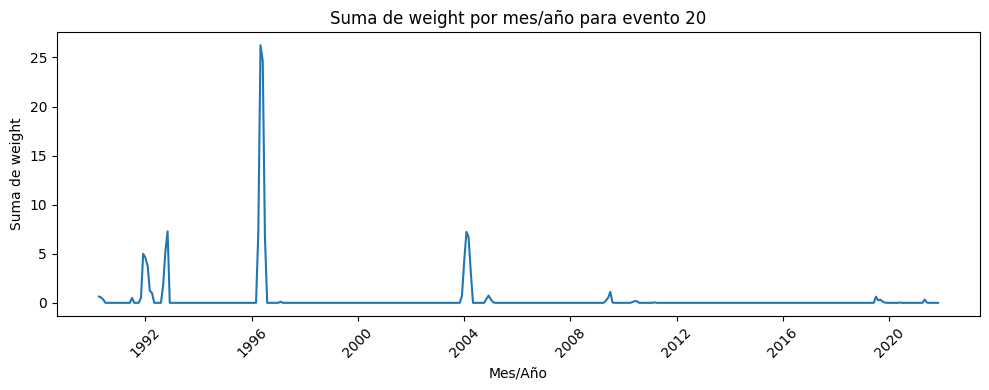

In [ ]:
# Create a datetime column
sucess_events_df['date'] = pd.to_datetime(
    sucess_events_df['Year'].astype(str) + '-' + sucess_events_df['month'].astype(str) + '-01'
)

events = [14, 16, 17, 19, 20]

for event in events:
    # Filter rows where the event occurred
    temp = sucess_events_df[sucess_events_df[str(event)] == 1]
    # Group by month/year and sum weight
    temp_grouped = temp.groupby('date')['weight'].sum()
    # Fill missing months with 0
    date_min = sucess_events_df['date'].min()
    date_max = sucess_events_df['date'].max()
    rango_dates = pd.date_range(date_min, date_max, freq='MS')
    temp_grouped = temp_grouped.reindex(rango_dates, fill_value=0)

    # Create individual plot
    plt.figure(figsize=(10,4))
    plt.plot(temp_grouped.index, temp_grouped.values)#, marker='o')
    plt.title(f'Weight sum per Month/Year for event {event}')
    plt.xlabel('Month/Year')
    plt.ylabel('Weight sum')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
event_clusters = """
Code,Description
14,Protest
16,Reduce Relations
17,Coerce
19,Fight
20,Use Unconventional Mass Violence
"""

# Convert the string into a DataFrame and then into a dictionary
df_clusters = pd.read_csv(io.StringIO(event_clusters))
cluster_dict = dict(zip(df_clusters['Code'].astype(str), df_clusters['Description']))

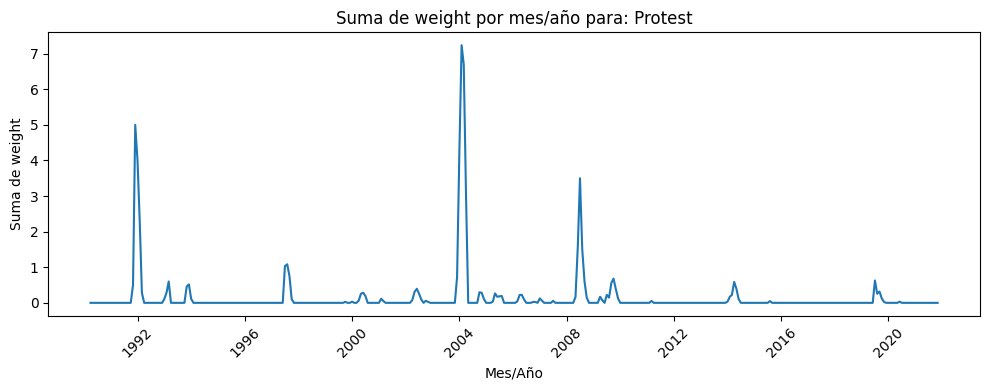

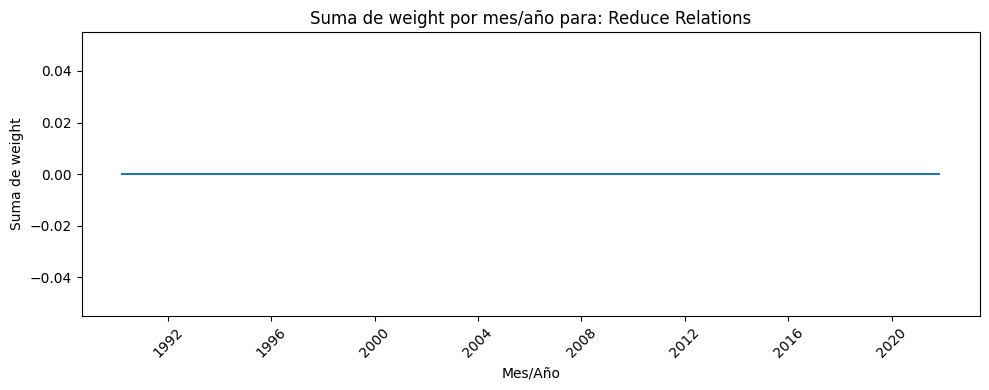

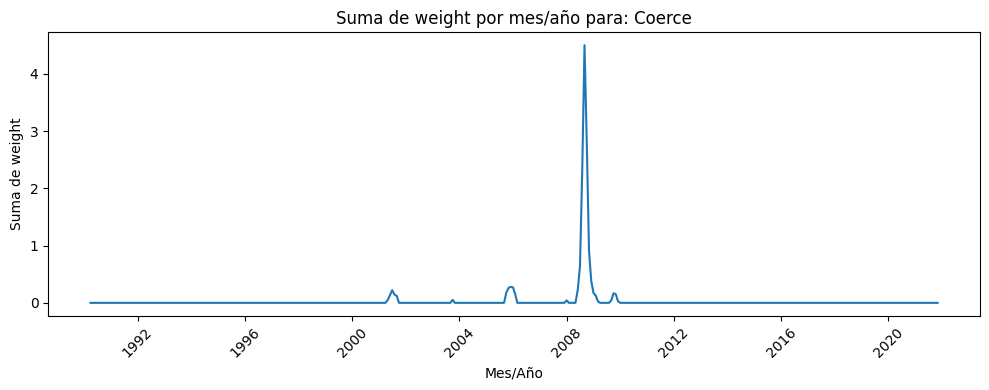

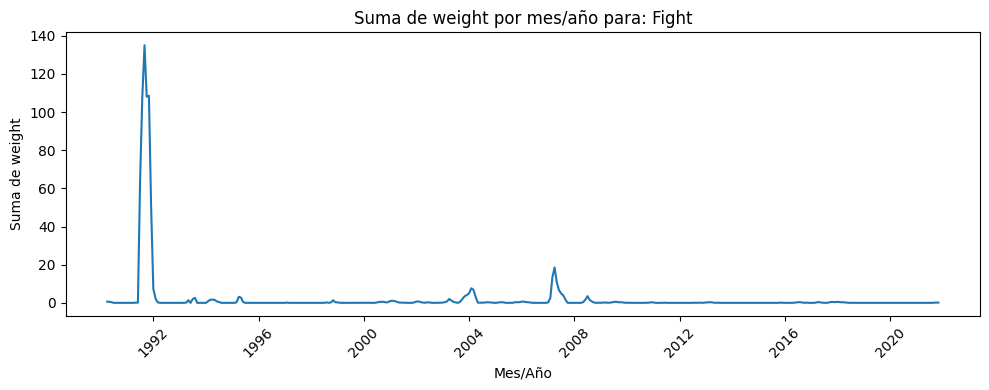

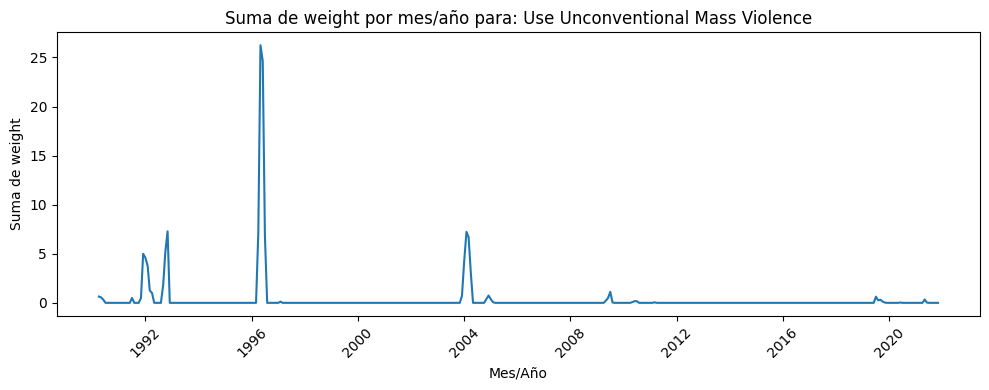

In [ ]:
# Create a datetime column
sucess_events_df['date'] = pd.to_datetime(
    sucess_events_df['Year'].astype(str) + '-' + sucess_events_df['month'].astype(str) + '-01'
)

events = [14, 16, 17, 19, 20]

for event in events:
    event_str = str(event)
    description = cluster_dict.get(event_str, f'event {event_str}')
    temp = sucess_events_df[sucess_events_df[event_str] == 1]
    temp_grouped = temp.groupby('fecha')['weight'].sum()
    date_min = sucess_events_df['date'].min()
    date_max = sucess_events_df['date'].max()
    range_dates = pd.date_range(date_min, date_max, freq='MS')
    temp_grouped = temp_grouped.reindex(range_dates, fill_value=0)

    plt.figure(figsize=(10,4))
    plt.plot(temp_grouped.index, temp_grouped.values)#, marker='o')
    plt.title(f'Weight sum Month/year for: {description}')
    plt.xlabel('Month/Year')
    plt.ylabel('Weight sum')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

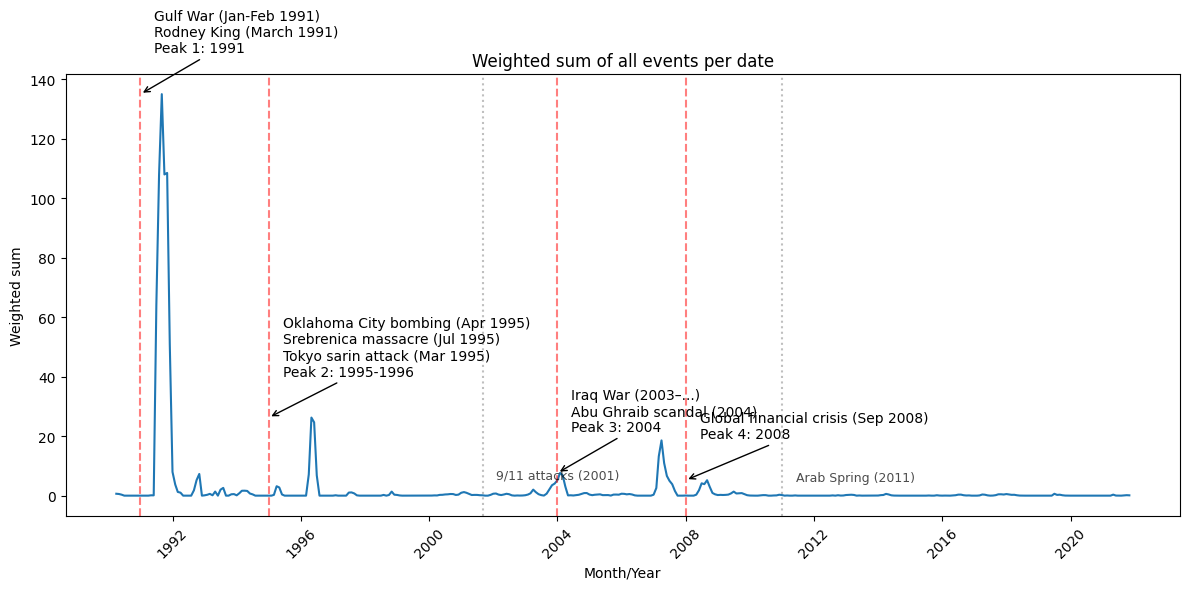

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create date column as the first day of each month
sucess_events_df['date'] = pd.to_datetime(sucess_events_df['Year'].astype(str) + '-' + sucess_events_df['month'].astype(str) + '-01')

# 2. Group by date and sum weights
df_grouped = sucess_events_df.groupby('date')['weight'].sum().reset_index()

# 3. Create full date range
fecha_min = df_grouped['date'].min()
fecha_max = df_grouped['date'].max()
rango_fechas = pd.date_range(fecha_min, fecha_max, freq='MS')  # 'MS' is month start

# 4. Reindex to include missing months, fill with 0
df_grouped = df_grouped.set_index('date').reindex(rango_fechas, fill_value=0).rename_axis('date').reset_index()

# 5. Plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['date'], df_grouped['weight'])
plt.xlabel('Month/Year')
plt.ylabel('Weighted sum')
plt.title('Weighted sum of all events per date')
plt.xticks(rotation=45)

# --- Add vertical lines and annotations for key peaks and events ---

# Peak 1: 1991 – Historical maximum
plt.axvline(pd.to_datetime('1991-01-01'), color='red', linestyle='--', alpha=0.5)
plt.annotate('Gulf War (Jan-Feb 1991)\nRodney King (March 1991)\nPeak 1: 1991',
             xy=(pd.to_datetime('1991-01-01'), df_grouped['weight'].max()),
             xytext=(10, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

# Peak 2: 1995-1996
plt.axvline(pd.to_datetime('1995-01-01'), color='red', linestyle='--', alpha=0.5)
plt.annotate('Oklahoma City bombing (Apr 1995)\nSrebrenica massacre (Jul 1995)\nTokyo sarin attack (Mar 1995)\nPeak 2: 1995-1996',
             xy=(pd.to_datetime('1995-01-01'), df_grouped[df_grouped['date'].dt.year.isin([1995, 1996])]['weight'].max()),
             xytext=(10, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

# Peak 3: 2004
plt.axvline(pd.to_datetime('2004-01-01'), color='red', linestyle='--', alpha=0.5)
plt.annotate('Iraq War (2003–...)\nAbu Ghraib scandal (2004)\nPeak 3: 2004',
             xy=(pd.to_datetime('2004-01-01'), df_grouped[df_grouped['date'].dt.year == 2004]['weight'].max()),
             xytext=(10, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

# Peak 4: 2008
plt.axvline(pd.to_datetime('2008-01-01'), color='red', linestyle='--', alpha=0.5)
plt.annotate('Global financial crisis (Sep 2008)\nPeak 4: 2008',
             xy=(pd.to_datetime('2008-01-01'), df_grouped[df_grouped['date'].dt.year == 2008]['weight'].max()),
             xytext=(10, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

# Minor peaks (example: 9/11, 2011)
plt.axvline(pd.to_datetime('2001-09-01'), color='gray', linestyle=':', alpha=0.5)
plt.annotate('9/11 attacks (2001)', xy=(pd.to_datetime('2001-09-01'), df_grouped[df_grouped['date'].dt.year == 2001]['weight'].max()),
             xytext=(10, 10), textcoords='offset points', fontsize=9, alpha=0.7)
plt.axvline(pd.to_datetime('2011-01-01'), color='gray', linestyle=':', alpha=0.5)
plt.annotate('Arab Spring (2011)', xy=(pd.to_datetime('2011-01-01'), df_grouped[df_grouped['date'].dt.year == 2011]['weight'].max()),
             xytext=(10, 10), textcoords='offset points', fontsize=9, alpha=0.7)

plt.tight_layout()
plt.show()

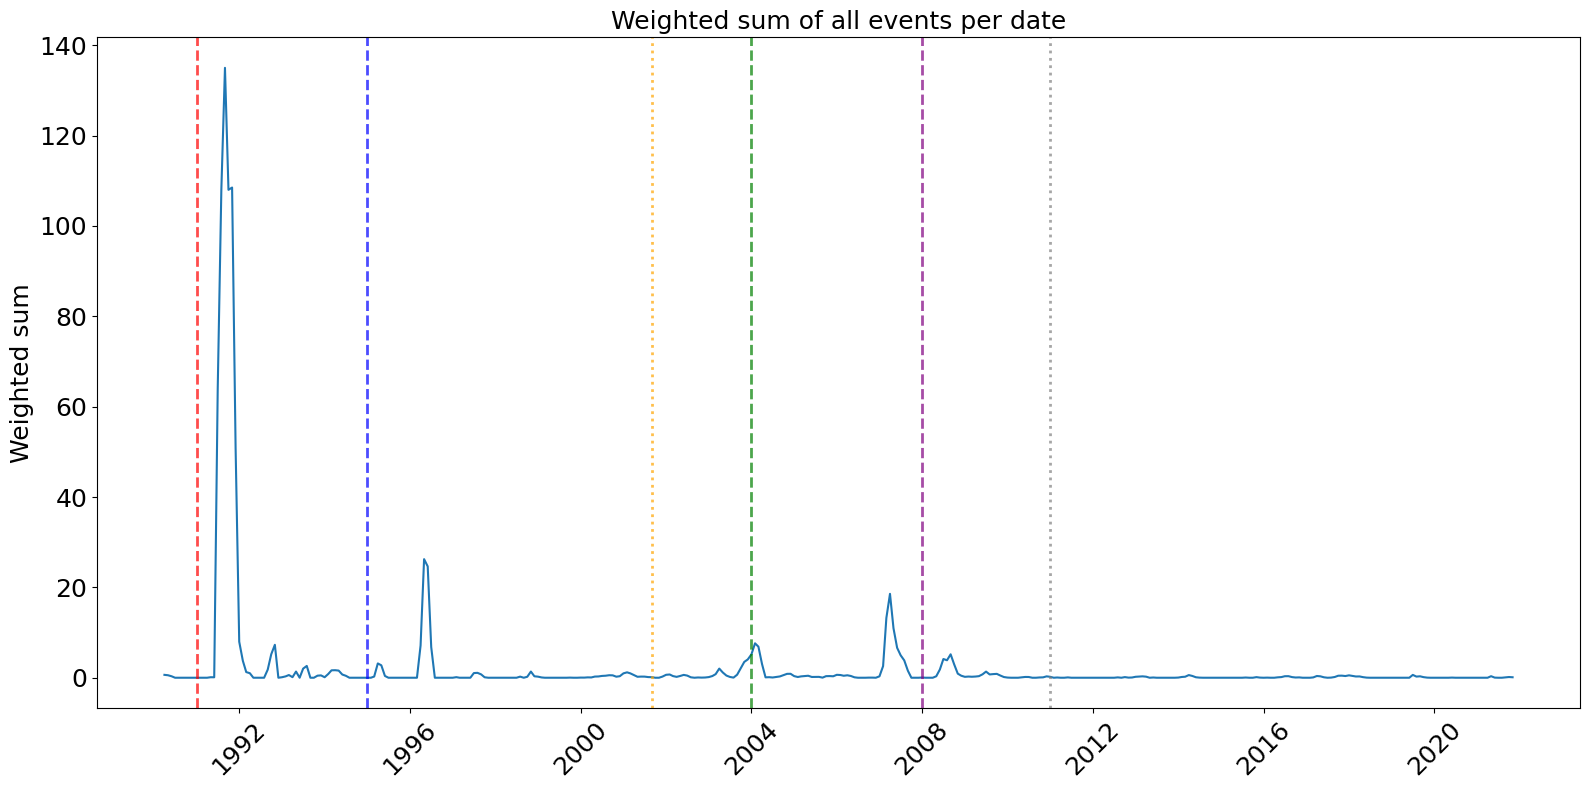

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create date column as the first day of each month
sucess_events_df['date'] = pd.to_datetime(sucess_events_df['Year'].astype(str) + '-' + sucess_events_df['month'].astype(str) + '-01')

# 2. Group by date and sum weights
df_grouped = sucess_events_df.groupby('date')['weight'].sum().reset_index()

# 3. Create full date range
fecha_min = df_grouped['date'].min()
fecha_max = df_grouped['date'].max()
rango_fechas = pd.date_range(fecha_min, fecha_max, freq='MS')

# 4. Reindex to include missing months, fill with 0
df_grouped = df_grouped.set_index('date').reindex(rango_fechas, fill_value=0).rename_axis('date').reset_index()

# 5. Plot the main line
plt.figure(figsize=(16, 8))
plt.plot(df_grouped['date'], df_grouped['weight'])
# plt.xlabel('Month/Year', fontsize=14)
plt.ylabel('Weighted sum', fontsize=18)
plt.title('Weighted sum of all events per date', fontsize=18)
plt.xticks(rotation=45)

# --- Define events, colors, and descriptions ---
events = {
    'Gulf War (Jan-Feb 1991), Rodney King (Mar 1991)': {'date': '1991-01-01', 'color': 'red', 'linestyle': '--'},
    'Oklahoma City bombing (Apr 1995),\nSrebrenica massacre (Jul 1995),\nTokyo sarin attack (Mar 1995)': {'date': '1995-01-01', 'color': 'blue', 'linestyle': '--'},
    'Iraq War (2003–...), Abu Ghraib scandal (2004)': {'date': '2004-01-01', 'color': 'green', 'linestyle': '--'},
    'Global financial crisis (Sep 2008)': {'date': '2008-01-01', 'color': 'purple', 'linestyle': '--'},
    '9/11 attacks (2001)': {'date': '2001-09-01', 'color': 'orange', 'linestyle': ':'},
    'Arab Spring (2011)': {'date': '2011-01-01', 'color': 'gray', 'linestyle': ':'}
}

# --- Add vertical lines and build legend handles ---
legend_handles = []
for desc, config in events.items():
    date = pd.to_datetime(config['date'])
    color = config['color']
    linestyle = config['linestyle']
    line = plt.axvline(date, color=color, linestyle=linestyle, alpha=0.7, linewidth=2)
    legend_handles.append(plt.Line2D([0], [0], color=color, linestyle=linestyle, label=desc, alpha=0.7, linewidth=2))

# --- Add legend ---
# plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# --- Cambiar tamaño de los números de los ejes ---
plt.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.show()


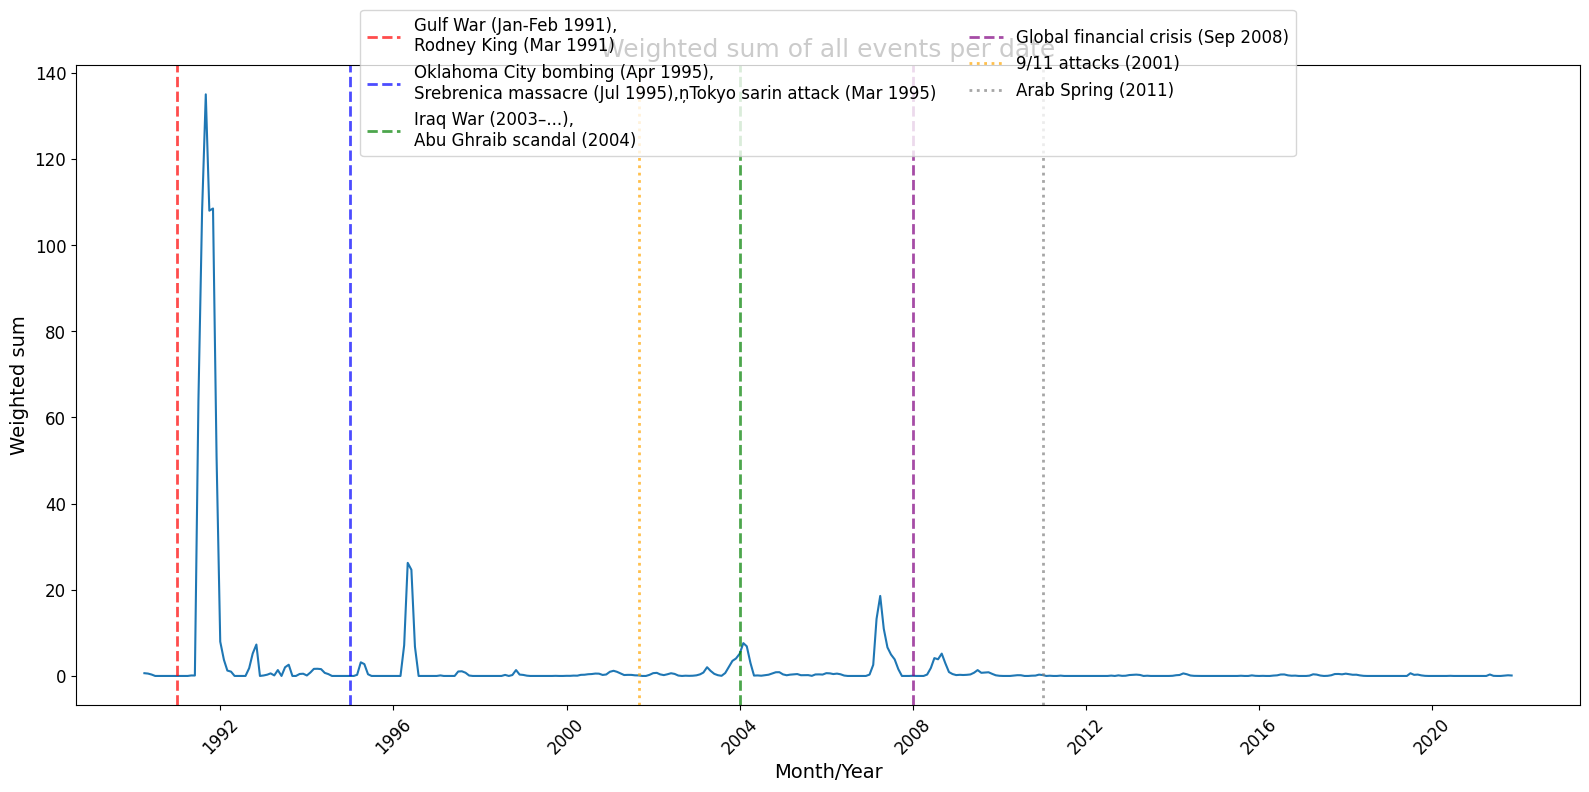

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# (Aquí va tu código previo para preparar el DataFrame y el plot...)

plt.figure(figsize=(16, 8))
plt.plot(df_grouped['date'], df_grouped['weight'])
plt.xlabel('Month/Year', fontsize=14)
plt.ylabel('Weighted sum', fontsize=14)
plt.title('Weighted sum of all events per date', fontsize=18)
plt.xticks(rotation=45)

# --- Define events, colors, and descriptions ---
events = {
    'Gulf War (Jan-Feb 1991),\nRodney King (Mar 1991)': {'date': '1991-01-01', 'color': 'red', 'linestyle': '--'},
    'Oklahoma City bombing (Apr 1995),\nSrebrenica massacre (Jul 1995),ņTokyo sarin attack (Mar 1995)': {'date': '1995-01-01', 'color': 'blue', 'linestyle': '--'},
    'Iraq War (2003–...),\nAbu Ghraib scandal (2004)': {'date': '2004-01-01', 'color': 'green', 'linestyle': '--'},
    'Global financial crisis (Sep 2008)': {'date': '2008-01-01', 'color': 'purple', 'linestyle': '--'},
    '9/11 attacks (2001)': {'date': '2001-09-01', 'color': 'orange', 'linestyle': ':'},
    'Arab Spring (2011)': {'date': '2011-01-01', 'color': 'gray', 'linestyle': ':'}
}

# --- Add vertical lines and build legend handles ---
legend_handles = []
for desc, config in events.items():
    date = pd.to_datetime(config['date'])
    color = config['color']
    linestyle = config['linestyle']
    line = plt.axvline(date, color=color, linestyle=linestyle, alpha=0.7, linewidth=2)
    legend_handles.append(plt.Line2D([0], [0], color=color, linestyle=linestyle, label=desc, alpha=0.7, linewidth=2))

# --- Leyenda encima de la gráfica ---
plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=12)

# --- Cambiar tamaño de los números de los ejes ---
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


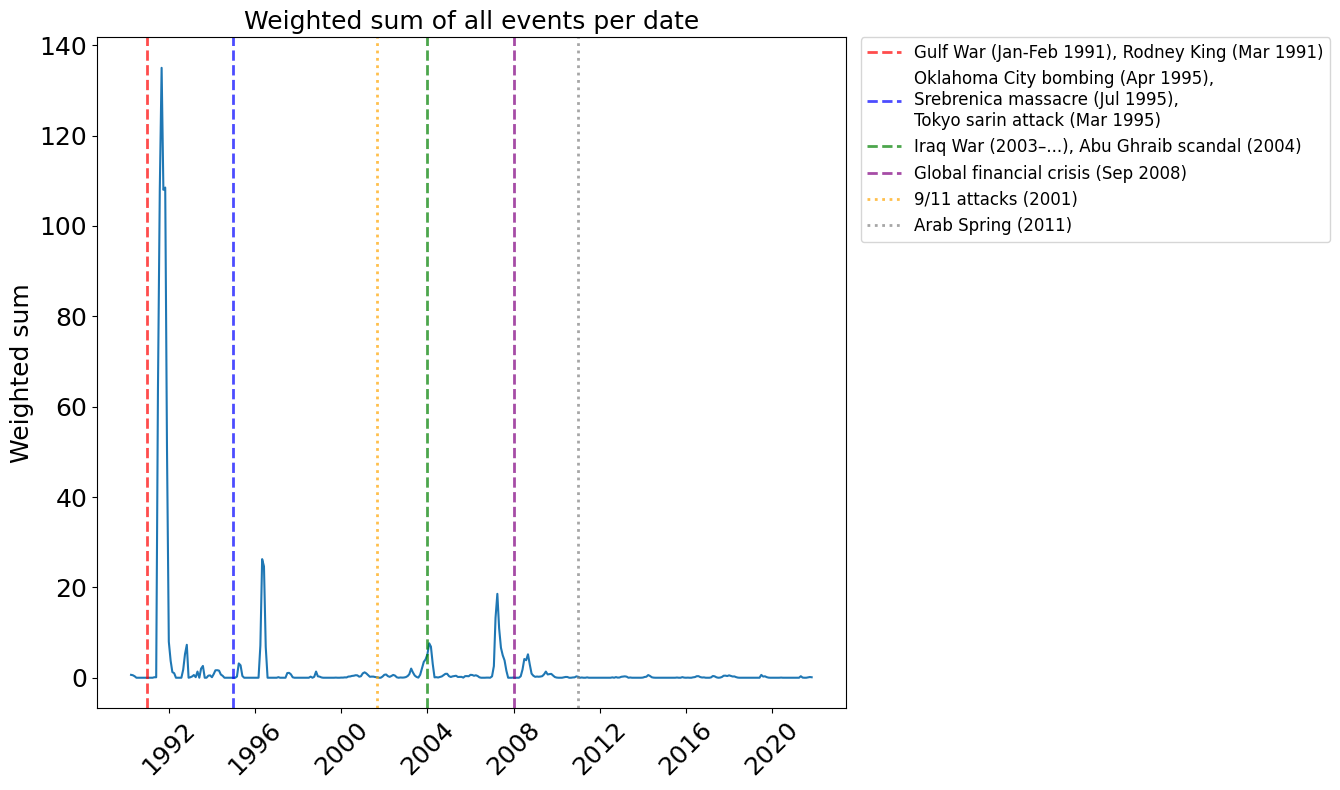

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create date column as the first day of each month
sucess_events_df['date'] = pd.to_datetime(sucess_events_df['Year'].astype(str) + '-' + sucess_events_df['month'].astype(str) + '-01')

# 2. Group by date and sum weights
df_grouped = sucess_events_df.groupby('date')['weight'].sum().reset_index()

# 3. Create full date range
fecha_min = df_grouped['date'].min()
fecha_max = df_grouped['date'].max()
rango_fechas = pd.date_range(fecha_min, fecha_max, freq='MS')

# 4. Reindex to include missing months, fill with 0
df_grouped = df_grouped.set_index('date').reindex(rango_fechas, fill_value=0).rename_axis('date').reset_index()

# 5. Plot the main line
plt.figure(figsize=(16, 8))
plt.plot(df_grouped['date'], df_grouped['weight'])
plt.ylabel('Weighted sum', fontsize=18)
plt.title('Weighted sum of all events per date', fontsize=18)
plt.xticks(rotation=45)

# --- Define events, colors, and descriptions ---
events = {
    'Gulf War (Jan-Feb 1991), Rodney King (Mar 1991)': {'date': '1991-01-01', 'color': 'red', 'linestyle': '--'},
    'Oklahoma City bombing (Apr 1995),\nSrebrenica massacre (Jul 1995),\nTokyo sarin attack (Mar 1995)': {'date': '1995-01-01', 'color': 'blue', 'linestyle': '--'},
    'Iraq War (2003–...), Abu Ghraib scandal (2004)': {'date': '2004-01-01', 'color': 'green', 'linestyle': '--'},
    'Global financial crisis (Sep 2008)': {'date': '2008-01-01', 'color': 'purple', 'linestyle': '--'},
    '9/11 attacks (2001)': {'date': '2001-09-01', 'color': 'orange', 'linestyle': ':'},
    'Arab Spring (2011)': {'date': '2011-01-01', 'color': 'gray', 'linestyle': ':'}
}

# --- Add vertical lines and build legend handles ---
legend_handles = []
for desc, config in events.items():
    date = pd.to_datetime(config['date'])
    color = config['color']
    linestyle = config['linestyle']
    line = plt.axvline(date, color=color, linestyle=linestyle, alpha=0.7, linewidth=2)
    legend_handles.append(plt.Line2D([0], [0], color=color, linestyle=linestyle, label=desc, alpha=0.7, linewidth=2))

# --- Add legend outside, top right ---
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=12, borderaxespad=0.)

# --- Cambiar tamaño de los números de los ejes ---
plt.tick_params(axis='both', which='major', labelsize=18)

# --- Ajustar el espacio para que la leyenda no tape el título ---
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajusta el rect para dejar espacio a la derecha (0.85 = 85% del ancho)

plt.show()
